In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import scipy.stats as stats

In [2]:
df =  pd.read_csv('bank (1).csv',sep=';')

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### EDA Perform

In [9]:
df.value_counts("job")

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
dtype: int64

In [10]:
df.value_counts("marital")

marital
married     2797
single      1196
divorced     528
dtype: int64

In [11]:
df.value_counts("education")

education
secondary    2306
tertiary     1350
primary       678
unknown       187
dtype: int64

In [12]:
df.value_counts("default")

default
no     4445
yes      76
dtype: int64

In [13]:
df.value_counts("housing")

housing
yes    2559
no     1962
dtype: int64

In [14]:
df.value_counts("loan")

loan
no     3830
yes     691
dtype: int64

In [15]:
df.value_counts("poutcome")

poutcome
unknown    3705
failure     490
other       197
success     129
dtype: int64

In [16]:
df.value_counts("y")

y  
no     4000
yes     521
dtype: int64

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

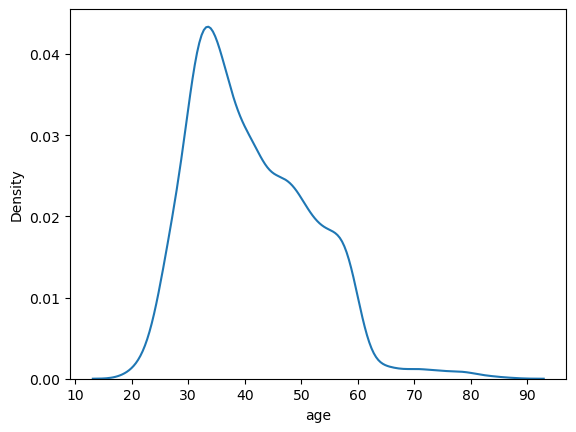

In [26]:
sns.distplot(df['age'],hist=False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

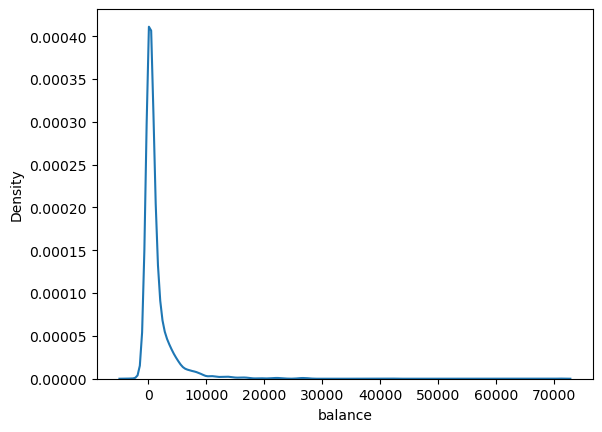

In [27]:
sns.distplot(df['balance'], hist= False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

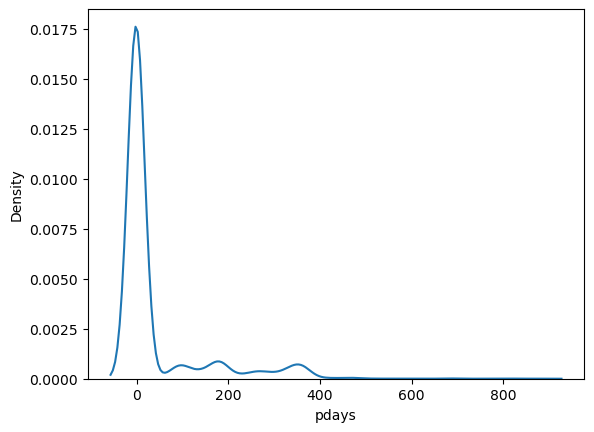

In [28]:
sns.distplot(df['pdays'], hist= False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

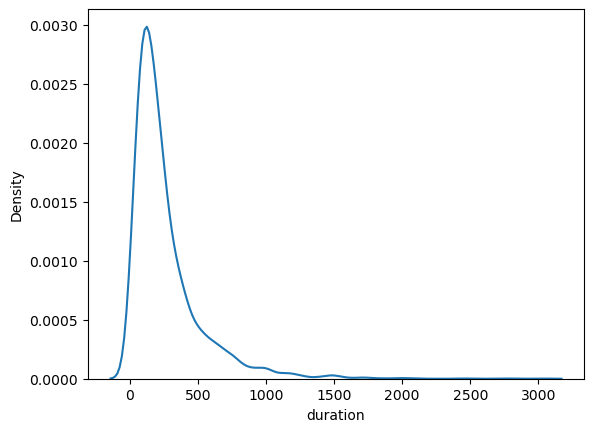

In [29]:
sns.distplot(df['duration'], hist=False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

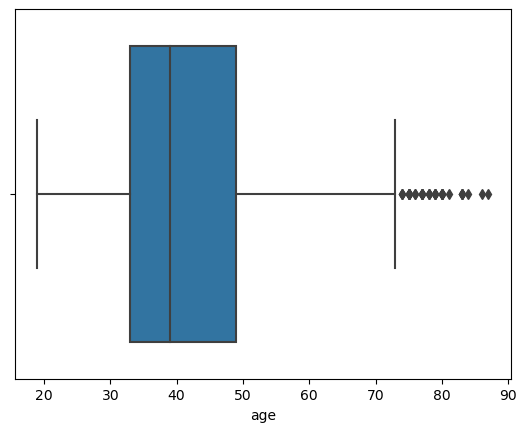

In [89]:
sns.boxplot(df['age'])

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

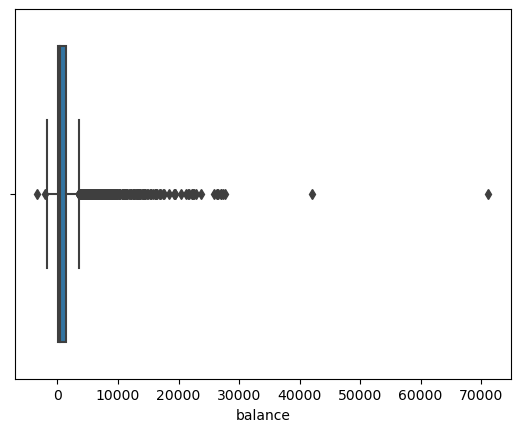

In [90]:
sns.boxplot(df['balance'])

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

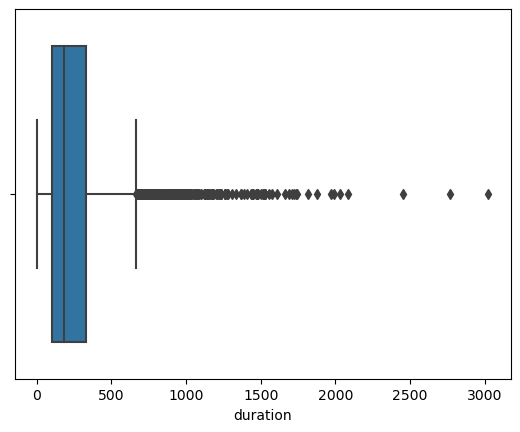

In [91]:
sns.boxplot(df['duration'])

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

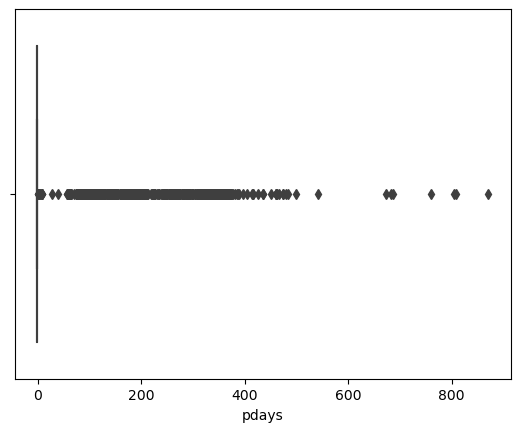

In [92]:
sns.boxplot(df['pdays'])

### Outliers

In [4]:
percen25_age = df['age'].quantile(0.25)
percen75_age = df['age'].quantile(0.75)

#### Cripping for Age
iqr_age= percen75_age-percen25_age


upper_limit_age=percen75_age+1.5*iqr_age
lower_limit_age=percen25_age-1.5*iqr_age





df_age=df.copy()
df_age['age']= np.where (df_age['age'] > upper_limit_age,upper_limit_age,
                         np.where(df_age['age'] < lower_limit_age,lower_limit_age,
                                 df_age['age']
                                 )
                         )

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

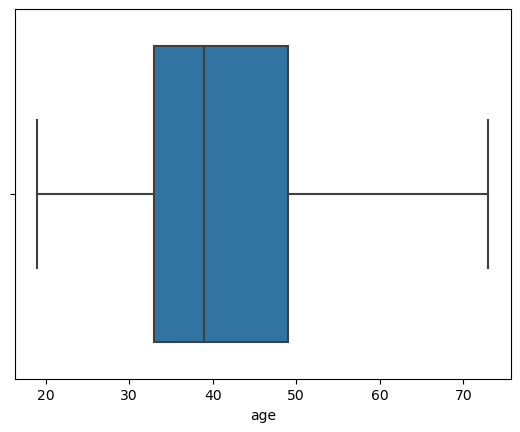

In [5]:
sns.boxplot(df_age['age'])

In [6]:
percen25_bal = df['balance'].quantile(0.25)
percen75_bal = df['balance'].quantile(0.75)
## cripping For balance

iqr_bal= percen75_bal-percen25_bal


upper_limit_bal=percen75_bal+1.5*iqr_bal
lower_limit_bal=percen25_bal-1.5*iqr_bal





df_bal=df_age.copy()
df_bal['balance']= np.where (df_bal['balance'] > upper_limit_bal,upper_limit_bal,
                         np.where(df_bal['balance'] < lower_limit_bal,lower_limit_bal,
                                 df_bal['balance']
                                 )
                         )

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

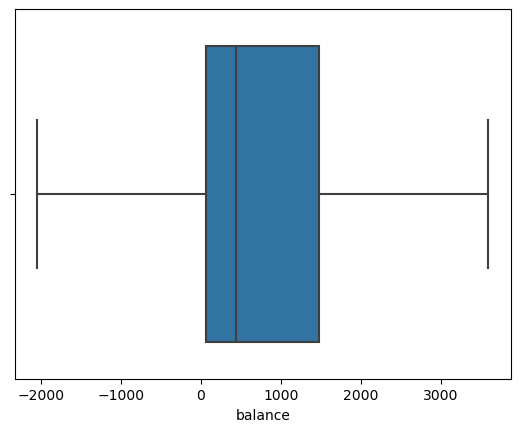

In [7]:
sns.boxplot(df_bal['balance'])

In [8]:
percen25_dur = df['duration'].quantile(0.25)
percen75_dur = df['duration'].quantile(0.75)
## cripping For duration

iqr_dur= percen75_dur-percen25_dur


upper_limit_dur=percen75_dur+1.5*iqr_dur
lower_limit_dur=percen25_dur-1.5*iqr_dur





df_dur=df_bal.copy()
df_dur['duration']= np.where (df_dur['duration'] > upper_limit_dur,upper_limit_dur,
                         np.where(df_dur['duration'] < lower_limit_dur,lower_limit_dur,
                                 df_dur['duration']
                                 )
                         )

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

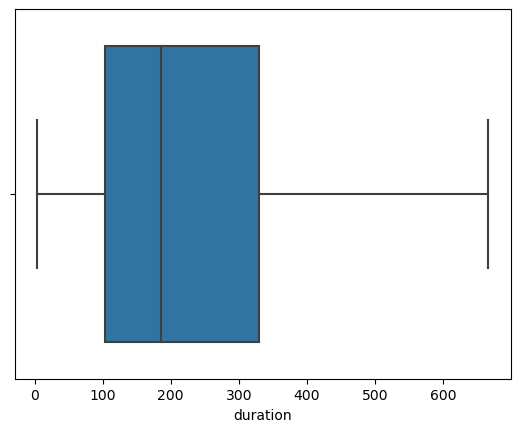

In [9]:
sns.boxplot(df_dur['duration'])

In [10]:
#percen25_pday = df['pdays'].quantile(0.25)
#percen75_pday = df['pdays'].quantile(0.75)
## cripping For pdays

#iqr_pday= percen75_pday-percen25_pday


#upper_limit_pday=percen75_pday+1.5*iqr_pday
#lower_limit_pday=percen25_pday-1.5*iqr_pday





#df_pday=df_dur.copy()
#df_pday['pdays']= np.where (df_pday['pdays'] > upper_limit_pday,upper_limit_pday,
                         #np.where(df_pday['pdays'] < lower_limit_pday,lower_limit_pday,
                                 #df_pday['pdays']
                                 #)
                        # )

In [11]:
#percen25_pday,percen75_pday

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='duration'>

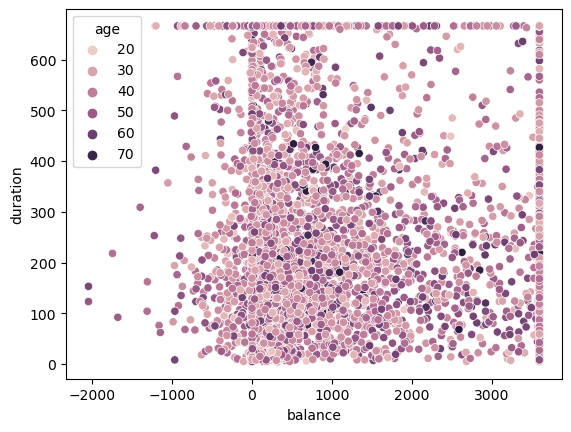

In [12]:
sns.scatterplot(df_dur['balance'], df_dur['duration'],hue = df_dur['age'])

### feature Engineering


#### One Hot Encoding

In [13]:
df_dur = pd.get_dummies(df_dur,columns = ['job'],drop_first = True)

In [14]:
df_dur.head(5)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30.0,married,primary,no,1787.0,no,no,cellular,19,oct,...,0,0,0,0,0,0,0,0,1,0
1,33.0,married,secondary,no,3596.5,yes,yes,cellular,11,may,...,0,0,0,0,0,1,0,0,0,0
2,35.0,single,tertiary,no,1350.0,yes,no,cellular,16,apr,...,0,0,1,0,0,0,0,0,0,0
3,30.0,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,...,0,0,1,0,0,0,0,0,0,0
4,59.0,married,secondary,no,0.0,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_dur = pd.get_dummies(df_dur,columns = ['marital'],drop_first = True)

In [16]:
df_dur.head(5)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,30.0,primary,no,1787.0,no,no,cellular,19,oct,79.0,...,0,0,0,0,0,0,1,0,1,0
1,33.0,secondary,no,3596.5,yes,yes,cellular,11,may,220.0,...,0,0,0,1,0,0,0,0,1,0
2,35.0,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,...,1,0,0,0,0,0,0,0,0,1
3,30.0,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,...,1,0,0,0,0,0,0,0,1,0
4,59.0,secondary,no,0.0,yes,no,unknown,5,may,226.0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df_dur = pd.get_dummies(df_dur,columns = ['education'],drop_first = True)

In [18]:
df_dur = pd.get_dummies(df_dur,columns = ['default'],drop_first = True)

In [19]:
df_dur = pd.get_dummies(df_dur,columns = ['housing'],drop_first = True)

In [20]:
df_dur = pd.get_dummies(df_dur,columns = ['loan'],drop_first = True)

In [21]:
df_dur = pd.get_dummies(df_dur,columns = ['contact'],drop_first = True)

In [22]:
df_dur = pd.get_dummies(df_dur,columns = ['month'],drop_first = True)

In [23]:
df_dur = pd.get_dummies(df_dur,columns = ['poutcome'],drop_first = True)

In [24]:
df_dur.head(5)

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30.0,1787.0,19,79.0,1,-1,0,no,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33.0,3596.5,11,220.0,1,339,4,no,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35.0,1350.0,16,185.0,1,330,1,no,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.0,1476.0,3,199.0,4,-1,0,no,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59.0,0.0,5,226.0,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
df_dur.shape

(4521, 43)

In [26]:
X = df_dur.drop("y", axis=1)
Y= df_dur["y"]

### Scale

In [27]:
from sklearn.preprocessing import StandardScaler #Standerd Scaler

In [28]:
scale = StandardScaler()

In [29]:
scale.fit(X)

StandardScaler()

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max = MinMaxScaler()

In [32]:
min_max.fit(X)

MinMaxScaler()

In [33]:
from sklearn.preprocessing import PowerTransformer

In [34]:
pt = PowerTransformer()

In [35]:
pt.fit(X)

PowerTransformer()

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

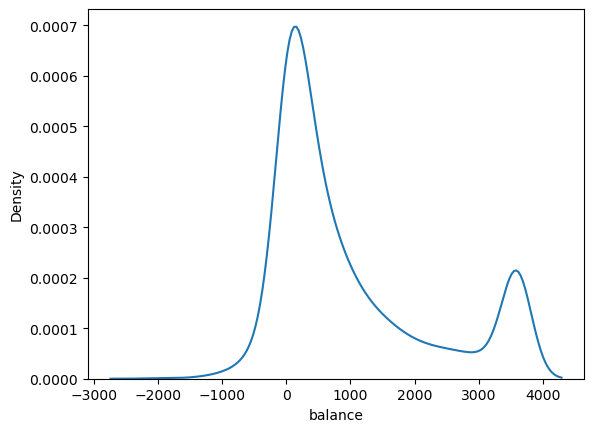

In [36]:
sns.distplot(X['balance'], hist= False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

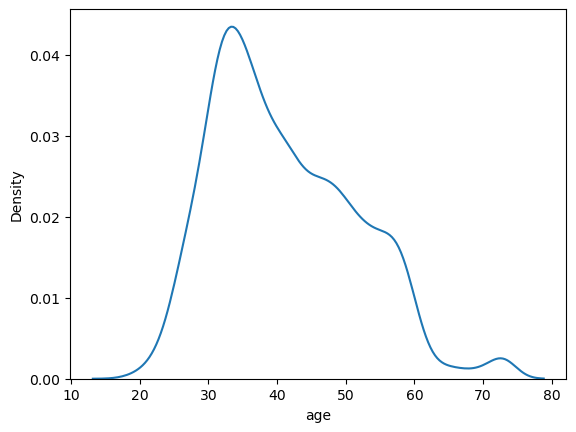

In [37]:
sns.distplot(X['age'], hist= False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

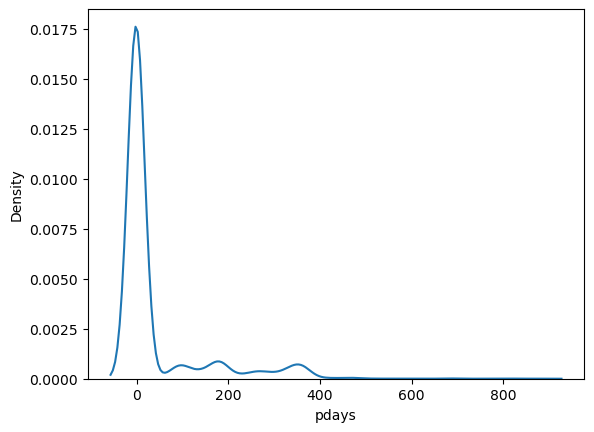

In [38]:
sns.distplot(X['pdays'], hist= False)

C:\Users\subhro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

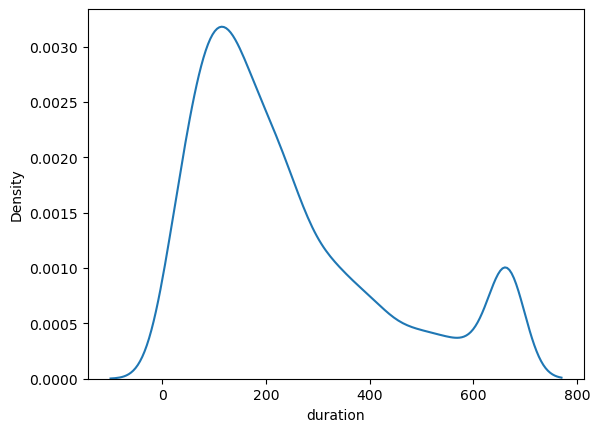

In [39]:
sns.distplot(X['duration'], hist= False)

### Train test split

In [40]:
from sklearn.model_selection import train_test_split 

In [41]:
X_train,X_test,y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

In [42]:
X_train.shape

(3616, 42)

### Label Encoder

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [46]:
y_train.shape

(3616,)

### Model Traning

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [67]:
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score

### DecisionTreeClassifier

In [49]:
dtc= DecisionTreeClassifier(criterion='entropy')

In [50]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [51]:
prediction_dtc=dtc.predict(X_test)

In [52]:
score1 = accuracy_score(y_test, prediction_dtc)

print("Decision_Tree",score1)

Decision_Tree 0.8674033149171271


In [104]:
print("Decision_Tree_f1 score", f1_score(y_test,prediction_dtc))
print("Decision_Tree_recall score", recall_score(y_test,prediction_dtc))
print("Decision_Tree_precision score", precision_score(y_test,prediction_dtc))
print("Decision_Tree_AUC_ROC score", roc_auc_score(y_test,prediction_dtc))

Decision_Tree_f1 score 0.37500000000000006
Decision_Tree_recall score 0.35294117647058826
Decision_Tree_precision score 0.4
Decision_Tree_AUC_ROC score 0.642846677899055


### RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rfc= RandomForestClassifier(bootstrap= False,criterion='gini',max_depth=6,max_features=0.5,n_estimators=50)

In [181]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features=0.5,
                       n_estimators=50)

In [182]:
predict_rfc= rfc.predict(X_test)

In [183]:
score2= accuracy_score(y_test,predict_rfc)

In [184]:
print("Accuracy Random_Forest",accuracy_score(y_test,predict_rfc))

Accuracy Random_Forest 0.887292817679558


In [105]:
print("Random_forest_f1 score", f1_score(y_test,predict_rfc))
print("Random_forest_Recall score", recall_score(y_test,predict_rfc))
print("Random_forest_Precision score", precision_score(y_test,predict_rfc))
print("Random_forest_AUC_ROC score", roc_auc_score(y_test,predict_rfc))

Random_forest_f1 score 0.2571428571428572
Random_forest_Recall score 0.17647058823529413
Random_forest_Precision score 0.47368421052631576
Random_forest_AUC_ROC score 0.5757819939931141


### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [168]:
clf1 = LogisticRegression(max_iter=50, multi_class='ovr', penalty='l1', solver='liblinear')

In [169]:
clf1.fit(X_train,y_train)

LogisticRegression(max_iter=50, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [170]:
predict_clf1= clf1.predict(X_test)

In [171]:
score3= accuracy_score(y_test,predict_clf1)

In [172]:
print("Accuracy Logistic_Regression",accuracy_score(y_test,predict_clf1))

Accuracy Logistic_Regression 0.8961325966850828


In [179]:
print("Logistic_Regerssion_f1 score", f1_score(y_test,predict_clf1))
print("Logistic_Regerssion_recall score", recall_score(y_test,predict_clf1))
print("Logistic_Regerssion_precision score", precision_score(y_test,predict_clf1))
print("Logistic_Regerssion_AUC_ROC score", roc_auc_score(y_test,predict_clf1))

Logistic_Regerssion_f1 score 0.36486486486486486
Logistic_Regerssion_recall score 0.2647058823529412
Logistic_Regerssion_precision score 0.5869565217391305
Logistic_Regerssion_AUC_ROC score 0.6205223060581643


### KNeighborsClassifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=6, weights='uniform')

In [174]:
clf2.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=6)

In [175]:
predict_clf2= clf2.predict(X_test)

C:\Users\subhro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [176]:
score4 = accuracy_score(y_test,predict_clf2)

In [177]:
print("Accuracy KNN",accuracy_score(y_test,predict_clf2))

Accuracy KNN 0.8729281767955801


In [178]:
print("KNN_f1 score", f1_score(y_test,predict_clf2))
print("KNN_recall score", recall_score(y_test,predict_clf2))
print("KNN_precision score", precision_score(y_test,predict_clf2))
print("KNN_AUC_ROC score", roc_auc_score(y_test,predict_clf2))

KNN_f1 score 0.13533834586466165
KNN_recall score 0.08823529411764706
KNN_precision score 0.2903225806451613
KNN_AUC_ROC score 0.5304190169218372


### SVC

In [86]:
from sklearn.svm import SVC

In [87]:
svm1 = SVC(probability=True, kernel='poly', degree=1)

In [88]:
svm1.fit(X_train,y_train)

SVC(degree=1, kernel='poly', probability=True)

In [89]:
predict_svm1= svm1.predict(X_test)

In [90]:
score5 = accuracy_score(y_test,predict_svm1)

In [91]:
print("Accuracy SVC",accuracy_score(y_test,predict_svm1))

Accuracy SVC 0.887292817679558


In [92]:
print("SVC_f1 score", f1_score(y_test,predict_svm1))
print("SVC_recall score", recall_score(y_test,predict_svm1))
print("SVC_precision score", precision_score(y_test,predict_svm1))
print("SVC_AUC_ROC score", roc_auc_score(y_test,predict_svm1))

SVC_f1 score 0.0
SVC_recall score 0.0
SVC_precision score 0.0
SVC_AUC_ROC score 0.5


C:\Users\subhro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GBC

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [190]:
clf3 = GradientBoostingClassifier(learning_rate=0.5,max_depth=10,min_samples_split=6,n_estimators= 150)

In [191]:
clf3.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, min_samples_split=6,
                           n_estimators=150)

In [192]:
predict_gbc= clf3.predict(X_test)

In [193]:
score6= accuracy_score(y_test,predict_gbc)

In [194]:
print("Accuracy GBC",accuracy_score(y_test,predict_gbc))

Accuracy GBC 0.887292817679558


In [195]:
print("GBC_f1 score", f1_score(y_test,predict_gbc))
print("GBC_recall score", recall_score(y_test,predict_gbc))
print("GBC_precision score", precision_score(y_test,predict_gbc))
print("GBC_AUC_ROC score", roc_auc_score(y_test,predict_gbc))

GBC_f1 score 0.4333333333333333
GBC_recall score 0.38235294117647056
GBC_precision score 0.5
GBC_AUC_ROC score 0.6668925353453959


### Voting Classifier

In [100]:
from sklearn.model_selection import cross_val_score

In [196]:
estimators = [('clf1',clf1),('rfc',rfc),('dtc',dtc),('clf2',clf2),('svm1',svm1),('clf3',clf3)]

In [197]:
from sklearn.ensemble import VotingClassifier

In [198]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X_train,y_train,cv=10,scoring='accuracy')
score7=np.round(np.mean(x),5)
print("Accuracy Voting Classifier",score7)

Accuracy Voting Classifier 0.90238


In [199]:
score7

0.90238

#### Plot The Accuracy of the data

In [207]:
data = {'Name': ['DT', 'RF', 'LR', 'KNN','SVC', 'GBC','VC'],
        'Score': [score1, score2, score3, score4, score5, score6, score7]}

In [208]:
model_score = pd.DataFrame(data)

In [209]:
model_score

,Name,Score
0,DT,0.867403
1,RF,0.887293
2,LR,0.896133
3,KNN,0.872928
4,SVC,0.887293
5,GBC,0.887293
6,VC,0.902380


<AxesSubplot:xlabel='Name', ylabel='Score'>

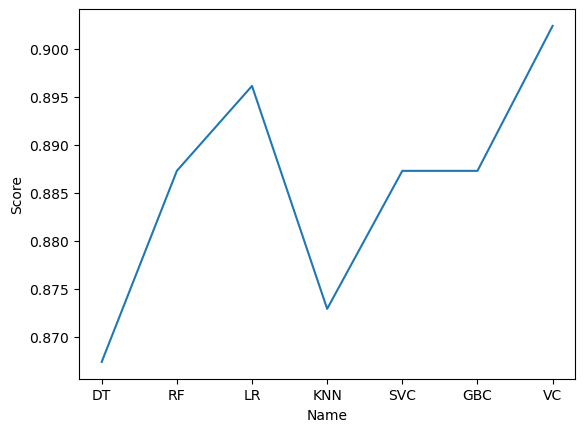

In [210]:
sns.lineplot(data=model_score, x="Name", y="Score")

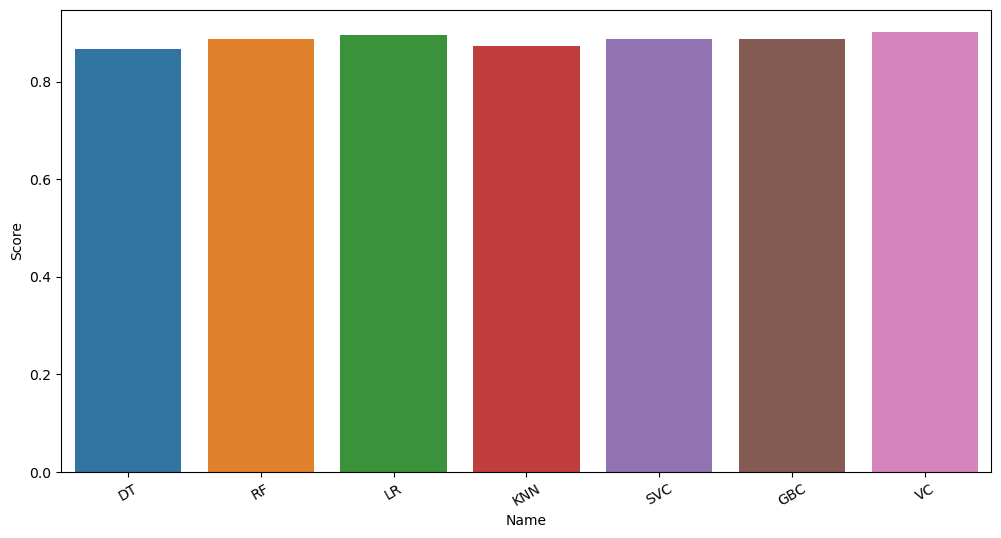

In [211]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_score["Name"], y=model_score["Score"])
plt.xticks(rotation=30)
plt.show()

# Conclusion

##### As it can be observed, we can use VotingClassifier for this type of data as it yields the best results with an accuracy score of 0.90238

### Grid Search CV

### For RF

In [106]:
from sklearn.model_selection import GridSearchCV

In [151]:
parameters= {
    'n_estimators':[50,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6],
    'bootstrap':[True,False],
    'max_features':[0.1,0.5,.08]
}

# For RandomForest

In [152]:
search_Rf = GridSearchCV(RandomForestClassifier(),parameters, cv=5)

In [153]:
search_Rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'max_features': [0.1, 0.5, 0.08],
                         'n_estimators': [50, 150, 200]})

In [154]:
search_Rf.best_score_

0.9040385746926175

In [155]:
search_Rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.5,
 'n_estimators': 50}

### For GBC

In [128]:
parameter_gbc = {
    'n_estimators':[50,150,200],
    'learning_rate':[0.1,0.5,5],
    #'subsample':[0.1,0.5,0.8],
    'min_samples_split':[3,6,10],
    #'min_samples_leaf' :[2,6,10],
    #'min_weight_fraction_leaf':[0.01,0.08,0.2],
    'max_depth':[2,10,15]
}

In [129]:
search_gbc = GridSearchCV(GradientBoostingClassifier(),parameter_gbc, cv=5)

In [130]:
search_gbc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 5],
                         'max_depth': [2, 10, 15],
                         'min_samples_split': [3, 6, 10],
                         'n_estimators': [50, 150, 200]})

In [131]:
search_gbc.best_score_

0.9032098454108495

In [132]:
search_gbc.best_params_

{'learning_rate': 0.5,
 'max_depth': 10,
 'min_samples_split': 6,
 'n_estimators': 150}

### For LR

In [134]:
parameter_lr = {
    'penalty':['l1','l2','elasticnet'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter':[50,150,200],
    'multi_class':['auto', 'ovr', 'multinomial']
}

In [136]:
search_lr = GridSearchCV(LogisticRegression(),parameter_lr, cv=5)

In [137]:
search_lr.fit(X_train,y_train)

C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lb

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [138]:
search_lr.best_score_

0.8962957444044536

In [139]:
search_lr.best_params_

{'max_iter': 50, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

### For KNN

In [145]:
parameter_knn = {
    'n_neighbors':[5,6,8,10],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,15,20]
}

In [146]:
search_knn = GridSearchCV(KNeighborsClassifier(),parameter_knn, cv=5)

In [147]:
search_knn.fit(X_train,y_train)

C:\Users\subhro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\subhro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20],
                         'n_neighbors': [5, 6, 8, 10],
                         'weights': ['uniform', 'distance']})

In [148]:
search_knn.best_score_

0.8791514790276855

In [149]:
search_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'weights': 'uniform'}